In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
data_df = pd.read_csv('final_data.csv')

classes = ['scout', 'soldier', 'pyro', 'demoman','heavy', 'engineer', 'medic', 'sniper', 'spy']
item_slots = ['headgear','misc','taunt','weapon']

not_accepted_df = data_df[data_df['accepted']==0]
accepted_df = data_df[data_df['accepted']==1]

data_df.head()

,discussions_count,comments_count,movie_count,screenshot_count,awards_count,link_count,file_size_mb,change_notes,certified_compatible,creator_count,featured_collection_count,visitors_count,favorites_count,accepted,posted_time,updated_time,passed_time,media_count,class_count,item_slot_count,submitted_by_submitter,class_scout,class_soldier,class_pyro,class_demoman,class_heavy,class_engineer,class_medic,class_sniper,class_spy,item_slot_headgear,item_slot_misc,item_slot_taunt,item_slot_weapon
0,0,154,0,6,0,0,4.971,7,1,2,115,5492,428,1,1.348987e+09,1.457338e+09,108350820.0,6,5,1,380,1,0,0,1,1,1,0,1,0,0,1,0,0
1,0,40,0,4,0,0,2.958,4,1,2,46,2218,173,1,1.348987e+09,1.445490e+09,96503100.0,4,1,1,380,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,238,0,2,0,0,4.277,1,0,4,100,11905,859,1,1.349004e+09,1.349004e+09,0.0,2,1,1,153,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,237,0,8,0,0,4.567,3,0,2,91,10085,650,1,1.349020e+09,1.349856e+09,835680.0,8,9,1,114,1,1,1,1,1,1,1,1,1,0,1,0,0
4,3,773,0,0,0,0,0.572,1,0,1,17,33200,102,1,1.328952e+09,1.328952e+09,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='class_count', ylabel='Count'>

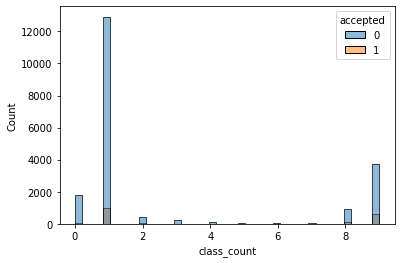

In [3]:
sns.histplot(data=data_df,x='class_count',hue='accepted')

<AxesSubplot:title={'center':'accepted'}, ylabel='class_count'>

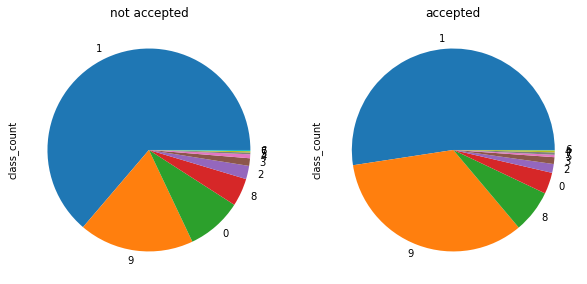

In [4]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

<AxesSubplot:title={'center':'accepted'}, ylabel='certified_compatible'>

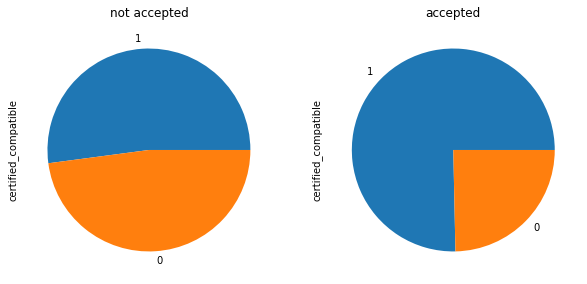

In [5]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

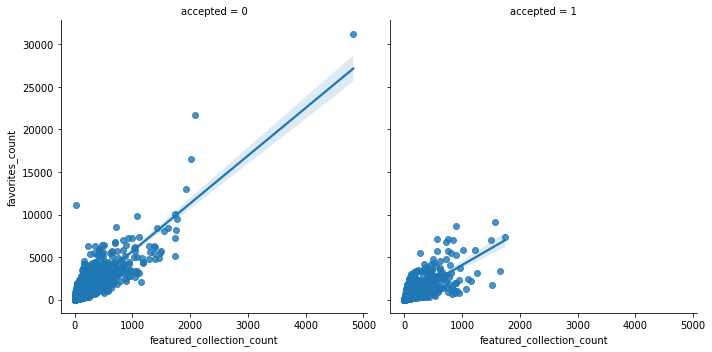

In [6]:
sns.lmplot( data=data_df,x="featured_collection_count", y="favorites_count", col="accepted")

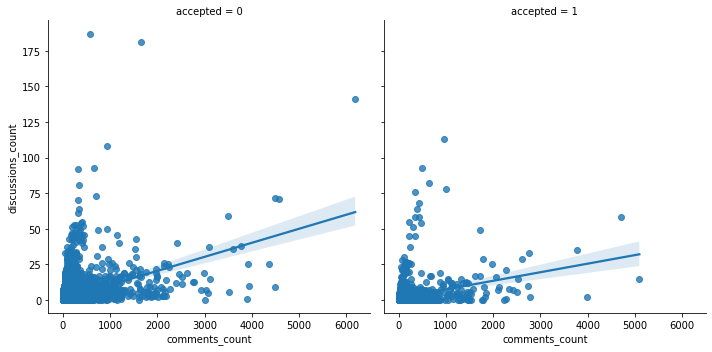

In [7]:
sns.lmplot( data=data_df,x="comments_count", y="discussions_count", col="accepted")

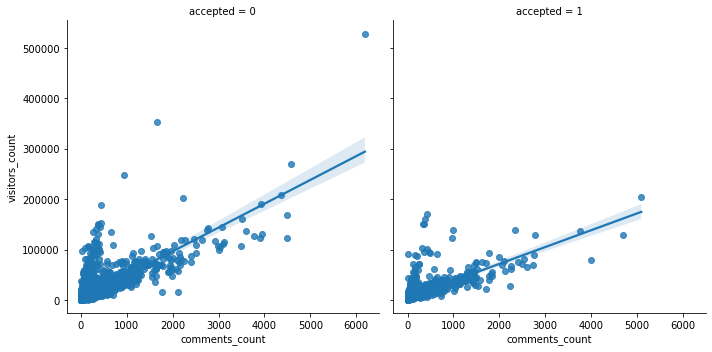

In [8]:
sns.lmplot(data=data_df,x="comments_count", y="visitors_count", col="accepted")

<AxesSubplot:xlabel='accepted', ylabel='screenshot_count'>

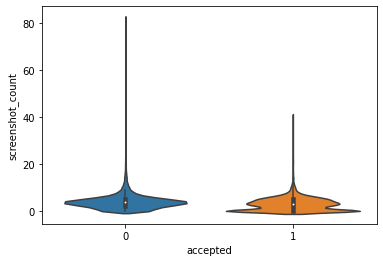

In [9]:
sns.violinplot(data=data_df,x='accepted',y='screenshot_count')

<AxesSubplot:>

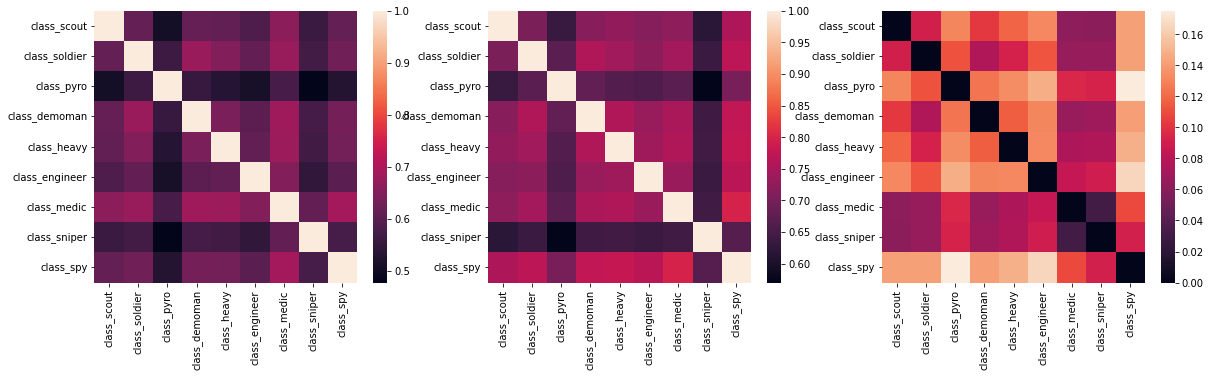

In [10]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_class_corr =accepted_df[[f'class_{c}' for c in classes]].corr()
not_accepted_class_corr =not_accepted_df[[f'class_{c}' for c in classes]].corr()


sns.heatmap(not_accepted_class_corr,ax=axes[0])
sns.heatmap(accepted_class_corr,ax=axes[1])
sns.heatmap(accepted_class_corr-not_accepted_class_corr,ax=axes[2])

<AxesSubplot:>

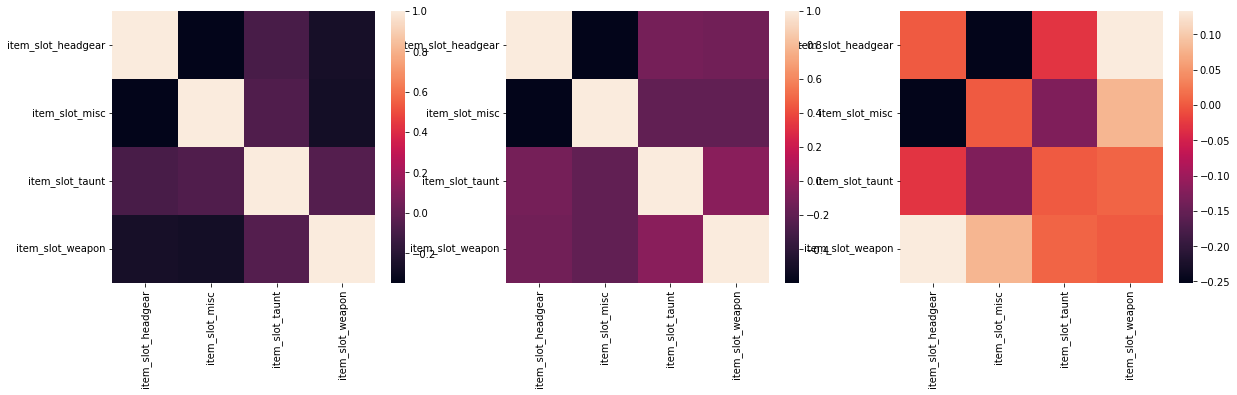

In [11]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_item_slot_corr =accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()
not_accepted_item_slot_corr =not_accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()


sns.heatmap(not_accepted_item_slot_corr,ax=axes[0])
sns.heatmap(accepted_item_slot_corr,ax=axes[1])
sns.heatmap(accepted_item_slot_corr-not_accepted_item_slot_corr,ax=axes[2])

<AxesSubplot:xlabel='passed_time', ylabel='Count'>

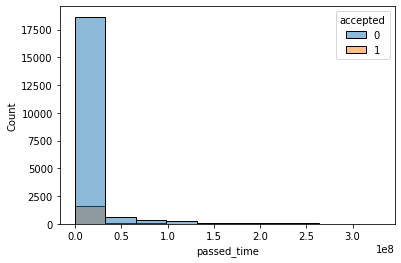

In [13]:
sns.histplot(data=data_df,x='passed_time',bins=10,hue='accepted')

<AxesSubplot:title={'center':'is_medal'}, ylabel='accepted'>

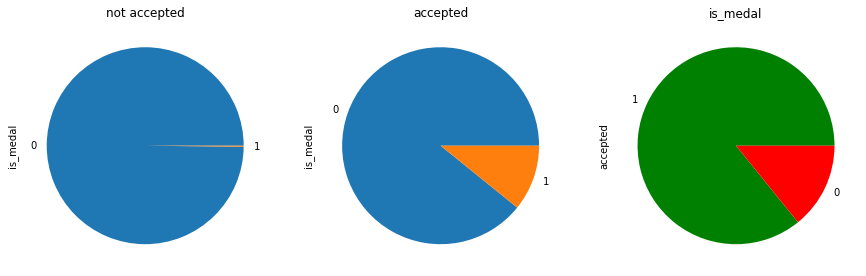

In [36]:
fig,axes = plt.subplots(1,3,facecolor='white',figsize=(15,5))

not_accepted_df['is_medal'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['is_medal'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

pd.concat([accepted_df[accepted_df['is_medal'] == 1],not_accepted_df[not_accepted_df['is_medal'] == 1]])['accepted'].value_counts().plot(kind='pie',ax=axes[2],title='is_medal',colors=['green','red'])